# Generate YOLOv3 Anchors From a Dataset

> Reference: 
- [decanbay/YOLOv3-Calculate-Anchor-Boxes](https://github.com/decanbay/YOLOv3-Calculate-Anchor-Boxes)
- [zabir-nabil/yolov3-anchor-clustering](https://github.com/zabir-nabil/yolov3-anchor-clustering)
- [Review: YOLOv3 锚框方法](https://jinhang.work/tech/review-yolov3/#%E9%94%9A%E6%A1%86%E6%96%B9%E6%B3%95)

<img src="./images/generate-anchors.png" alt="Anchors" width="600"/>

In [104]:
DATASET_PATH = "../datasets/ego-hand"
K_CLUSTERS = 9
IMAGE_SIZE = 416

In [105]:
import os
import glob
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from sklearn.cluster import KMeans

In [106]:
# Get paths of training images and labels
ann_paths = []
with open(os.path.join(DATASET_PATH, 'train.txt'), 'r') as f:
    for line in f:
        line = line[:-1]    # Strip `\n`
        img_name = os.path.basename(line)
        ann_path = os.path.join(DATASET_PATH, 'labels', img_name[:-3] + 'txt')
        ann_paths.append(ann_path)

In [107]:
len(ann_paths)

8170

In [108]:
# Get normalised widths and heights from annotation files *.txt
ws = []
hs = []

lines = []
for ann_path in ann_paths:
    with open(ann_path, 'r') as f:
        for line in f:
            line = line[:-1].split()
            w, h = [float(i) for i in line[-2:]]
            ws.append(w)
            hs.append(h)

In [109]:
# Generate input data as [w,h] pairs
ws = np.asarray(ws)
hs = np.asarray(hs)
x = [ws, hs]
x = np.asarray(x).transpose()

In [110]:
x.shape

(14559, 2)

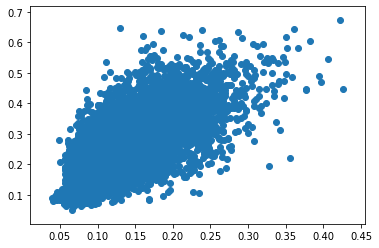

In [111]:
# Plot the [w,h] pairs in scatter graph
plt.scatter(x[:, 0], x[:, 1], label="True position")
plt.show()

In [112]:
# KMeans clustering
kmeans = KMeans(n_clusters = K_CLUSTERS).fit(x)

In [113]:
anchors = kmeans.cluster_centers_
anchors

array([[0.10722228, 0.23102491],
       [0.24127379, 0.48758179],
       [0.14318332, 0.32579809],
       [0.08776252, 0.12655235],
       [0.12952516, 0.2721676 ],
       [0.21984439, 0.3251946 ],
       [0.16150799, 0.21530426],
       [0.09984586, 0.18514438],
       [0.18300149, 0.39848684]])

In [114]:
anchors = anchors*IMAGE_SIZE
anchors

array([[ 44.60446916,  96.10636147],
       [100.36989642, 202.83402651],
       [ 59.56426184, 135.53200752],
       [ 36.50920729,  52.64577889],
       [ 53.88246653, 113.22171962],
       [ 91.45526681, 135.28095348],
       [ 67.18732245,  89.56657187],
       [ 41.53587878,  77.02006205],
       [ 76.12862134, 165.77052614]])

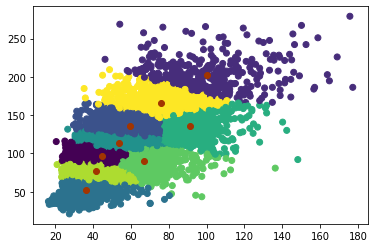

In [115]:
# Plot scatter graph of [w,h] pairs
plt.figure()
plt.scatter(x[:,0]*IMAGE_SIZE, x[:,1]*IMAGE_SIZE, c=kmeans.labels_, cmap="viridis")
plt.scatter(anchors[:,0], anchors[:,1], color='#a23500')
plt.savefig("./images/anchor-kmeans.png")
plt.show()

In [116]:
# Round the anchor sizes
anchors = np.rint(anchors)
anchors

array([[ 45.,  96.],
       [100., 203.],
       [ 60., 136.],
       [ 37.,  53.],
       [ 54., 113.],
       [ 91., 135.],
       [ 67.,  90.],
       [ 42.,  77.],
       [ 76., 166.]])

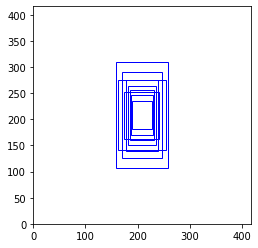

In [117]:
# Plot anchors
fig, ax = plt.subplots()
for k in range(K_CLUSTERS):
    rect = patches.Rectangle(
        (IMAGE_SIZE/2 - anchors[k,0]/2, IMAGE_SIZE/2 - anchors[k,1]/2),
        anchors[k,0], anchors[k,1],
        linewidth = 1,
        edgecolor = 'b',
        facecolor='b',
        fill= None
    )
    ax.add_patch(rect)
ax.set_aspect(1.0)
plt.axis([0, IMAGE_SIZE, 0, IMAGE_SIZE])
plt.savefig("./images/anchor-boxes-rects.png")
plt.show()

In [118]:
# Print and save anchors
anchors.sort(axis=0)
anchors = anchors.astype(int)
print("Anchors are: \n{}".format(anchors))

with open(os.path.join(DATASET_PATH, 'anchors.txt'), 'w') as f:
    for w, h in anchors:
        f.write("{}, {}\n".format(w, h))

print("\nAnchors saved to {}".format(os.path.join(DATASET_PATH, 'anchors.txt')))

Anchors are: 
[[ 37  53]
 [ 42  77]
 [ 45  90]
 [ 54  96]
 [ 60 113]
 [ 67 135]
 [ 76 136]
 [ 91 166]
 [100 203]]

Anchors saved to ../datasets/ego-hand\anchors.txt
